# Decision Tree Classification in-depth

## Importing Libs

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [59]:
# Loading the DataSet
df = pd.read_csv('golf_df.csv')

## Exploratory Data Analysis

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Profile Report Golf Dataset')
profile.to_file('Profile_Report')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\intwa\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:266: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

From EDA we conclude that:
Null Values - N/A
Duplicates -  N/A
Correlation - 


## Data Preprocessing

In [60]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [61]:
from sklearn.preprocessing import LabelEncoder

In [63]:
input = df.copy()
a_outlook = LabelEncoder()
a_temperature = LabelEncoder()
a_humidity = LabelEncoder()
a_windy = LabelEncoder()
a_play = LabelEncoder()

In [64]:
input.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [65]:
input['outlook_n'] = a_outlook.fit_transform(input['Outlook'])
input['temperature_n'] = a_outlook.fit_transform(input['Temperature'])
input['humidity_n'] = a_outlook.fit_transform(input['Humidity'])
input['windy_n'] = a_outlook.fit_transform(input['Windy'])
input['play_n'] = a_outlook.fit_transform(input['Play'])

In [66]:
input.head()

,Outlook,Temperature,Humidity,Windy,Play,outlook_n,temperature_n,humidity_n,windy_n,play_n
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rainy,mild,high,False,yes,1,2,0,0,1
4,rainy,cool,normal,False,yes,1,0,1,0,1


In [68]:
input_n = input.drop(['Outlook','Temperature','Humidity','Windy','Play'], axis=1)
input_n.head()

,outlook_n,temperature_n,humidity_n,windy_n,play_n
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(input_n.drop('play_n',axis=1), input_n['play_n'], test_size=0.33, random_state=0)

## Model1 with GINI Index

In [74]:
 model = tree.DecisionTreeClassifier() 

In [75]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
model.score(X_train, y_train)

1.0

In [118]:
model.predict([[0,1,2,1]])


array([1])

## Model2 with Entropy

In [82]:
model2  = tree.DecisionTreeClassifier(criterion ='entropy')

In [83]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [84]:
model2.score(X_train, y_train)

1.0

In [101]:
model2.predict([[0,1,2,1]])

array([1])

## Visualizing Tree

[Text(372.0, 285.39000000000004, 'X[2] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(223.20000000000002, 203.85000000000002, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(148.8, 122.31, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 40.76999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 40.76999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.6, 122.31, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(520.8000000000001, 203.85000000000002, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(446.40000000000003, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(595.2, 122.31, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

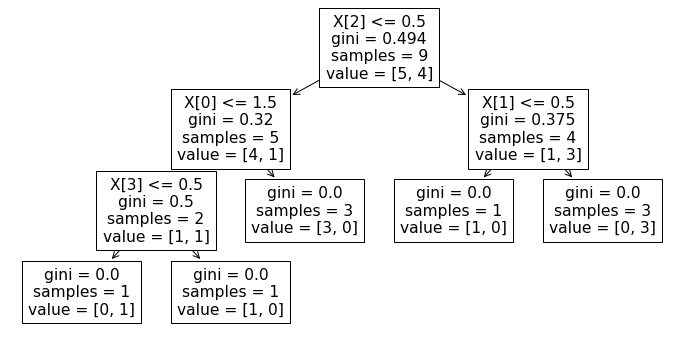

In [110]:
plt.figure(figsize=(12,6))
tree.plot_tree(model)

## Accuracy

In [116]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X_train, y_train, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


Accuracy: 0.400 (0.200)


## Confusion Matrix

In [119]:
from sklearn.metrics import confusion_matrix
predicted = model.predict(X_test)
matrix= confusion_matrix(y_test, predicted)
print(matrix)
print(predicted)

[[0 0]
 [4 1]]
[0 0 0 0 1]


Last column has 1 which means "We can PLAY GOLF"

## Classification Report

In [121]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.20      0.33         5

    accuracy                           0.20         5
   macro avg       0.50      0.10      0.17         5
weighted avg       1.00      0.20      0.33         5



## Post Pruning

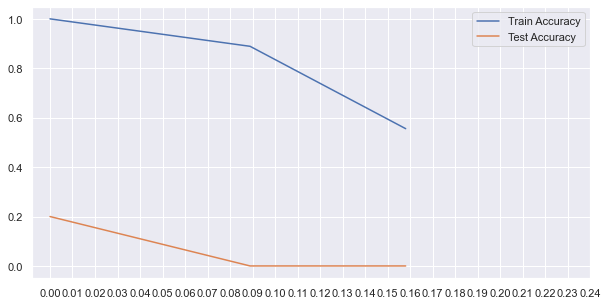

In [129]:
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np

path = model.cost_complexity_pruning_path(X_train, y_train)
alphas= path['ccp_alphas']
alphas

accuracy_train, accuracy_test=[],[]

for i in alphas:
  tree=DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train, y_train)
  y_train_pred=tree.predict(X_train)
  y_test_pred = tree.predict(X_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test, y_test_pred))

sns.set()
plt.figure(figsize=(10,5))
sns.lineplot(y=accuracy_train, x=alphas, label="Train Accuracy")
sns.lineplot(y=accuracy_test, x=alphas, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

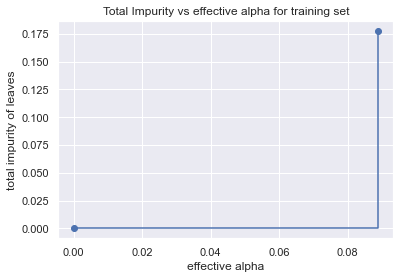

In [124]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [125]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 9 with ccp_alpha: 0.15802469135802472


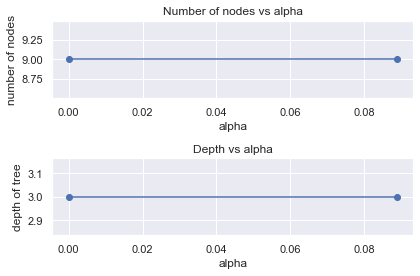

In [126]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [model.tree_.node_count for model in clfs]
depth = [model.tree_.max_depth for model in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

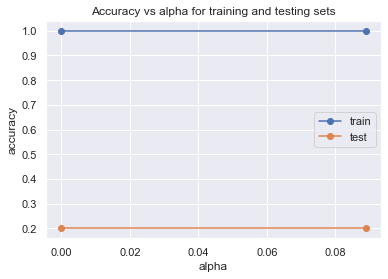

In [127]:
train_scores = [model.score(X_train, y_train) for model in clfs]
test_scores = [model.score(X_test, y_test) for model in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()